In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import astropy.units as u

import os
gd_folder = os.getcwd()+"/../../Calculations/Gas_and_dust/"

import sys 
sys.path.append(gd_folder)
from polWaveDust import PolWaveDust

In [2]:
dust_types = ["SMC","LMC"]
pp = dict()
for dust_type in dust_types:
    pp[dust_type] = PolWaveDust(dust_type, interp_method='cubic')
    print(np.min(pp[dust_type].wave_grid), np.max(pp[dust_type].wave_grid))
theta = 70*u.deg
psi = 45*u.deg
lam = np.arange(1000., 3080., 20.)*u.AA

1000.0 Angstrom 3080.0 Angstrom
1000.0 Angstrom 3080.0 Angstrom


In [3]:
#Maximum fractional difference
for dust_type in dust_types:
    s1 = pp[dust_type].s1((lam, theta*np.ones(len(lam)), psi*np.ones(len(lam))))
    min_s1 = np.min(s1)
    max_s1 = np.max(s1)
    print(min_s1, max_s1, max_s1/min_s1)

1.7005552089609895e-23 2.745745260970471e-23 1.6146169477485386
1.9414307020824338e-23 3.039503040694388e-23 1.5655995536869436


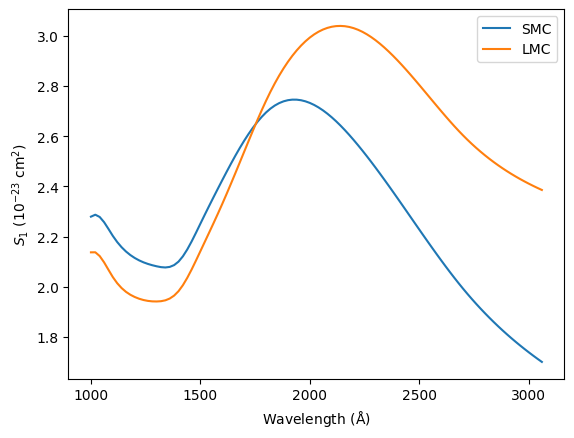

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for dust_type in dust_types:
    s1 = pp[dust_type].s1((lam, theta*np.ones(len(lam)), psi*np.ones(len(lam))))
    ax.plot(lam, s1*1e23, label=dust_type)
    
ax.set_ylabel(r"$S_1~(10^{-23}~\rm cm^{2})$")
ax.set_xlabel(r"Wavelength ($\rm \AA$)")
ax.legend()
plt.show()

In [5]:
pp[dust_type].s1_grid.shape, pp[dust_type].wave_grid.shape, pp[dust_type].theta_grid.shape, pp[dust_type].psi_grid.shape

((105, 36, 37), (105,), (36,), (37,))

In [29]:
max_ratios = dict()
for dust_type in dust_types:
    max_ratios[dust_type] = np.ma.zeros((len(pp[dust_type].theta_grid), len(pp[dust_type].psi_grid)))
    wave = pp[dust_type].wave_grid
    max_ratio = max_ratios[dust_type]
    max_ratio.mask = np.zeros(max_ratio.shape, dtype=bool)
    for i, th in enumerate(pp[dust_type].theta_grid):
        for j, psi in enumerate(pp[dust_type].psi_grid):
            if psi==0 or th<psi:
                max_ratio[i,j] = np.nan
                max_ratio.mask[i,j] = True
                continue
            s1 = pp[dust_type].s1((wave, th*np.ones(len(wave)), psi*np.ones(len(wave))))
            min_s1 = np.min(s1)
            max_s1 = np.max(s1)
            max_ratio[i,j] = max_s1/min_s1

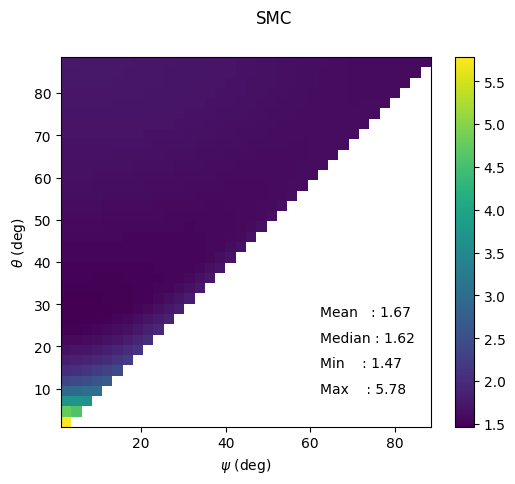

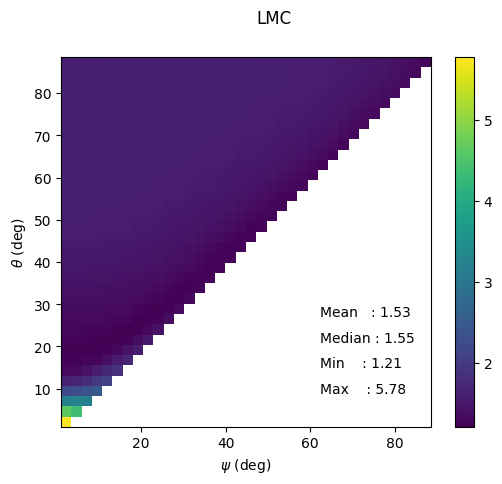

In [41]:
for dust_type in dust_types:

    max_ratio = max_ratios[dust_type]

    fig, ax = plt.subplots(1)

    #Limits of the grid.
    x0 = pp[dust_type].psi_grid[1].value
    x1 = pp[dust_type].psi_grid[-1].value
    y0 = pp[dust_type].theta_grid[0].value
    y1 = pp[dust_type].theta_grid[-1].value

    #Plot the grid.
    cm = ax.imshow(max_ratio[:,1:], origin='lower', extent=[x0,x1,y0,y1], cmap='viridis')#, norm=colors.LogNorm(vmin=max_ratio[~np.isnan(max_ratio)].min(), vmax=max_ratio[~np.isnan(max_ratio)].max()))

    ax.text(0.7,0.3,"{:6s} : {:.2f}".format("Mean", max_ratio.mean()), transform=ax.transAxes)
    ax.text(0.7,0.23,"{:6s} : {:.2f}".format("Median",np.ma.median(max_ratio)), transform=ax.transAxes)
    ax.text(0.7,0.16,"{:6s} : {:.2f}".format("Min", max_ratio.min()), transform=ax.transAxes)
    ax.text(0.7,0.09,"{:6s} : {:.2f}".format("Max", max_ratio.max()), transform=ax.transAxes)

    fig.suptitle(dust_type)
    ax.set_xlabel(r'$\psi~(\rm deg)$')
    ax.set_ylabel(r'$\theta~(\rm deg)$')

    fig.colorbar(cm)
    plt.show()